In [1]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = 'Alz/train'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


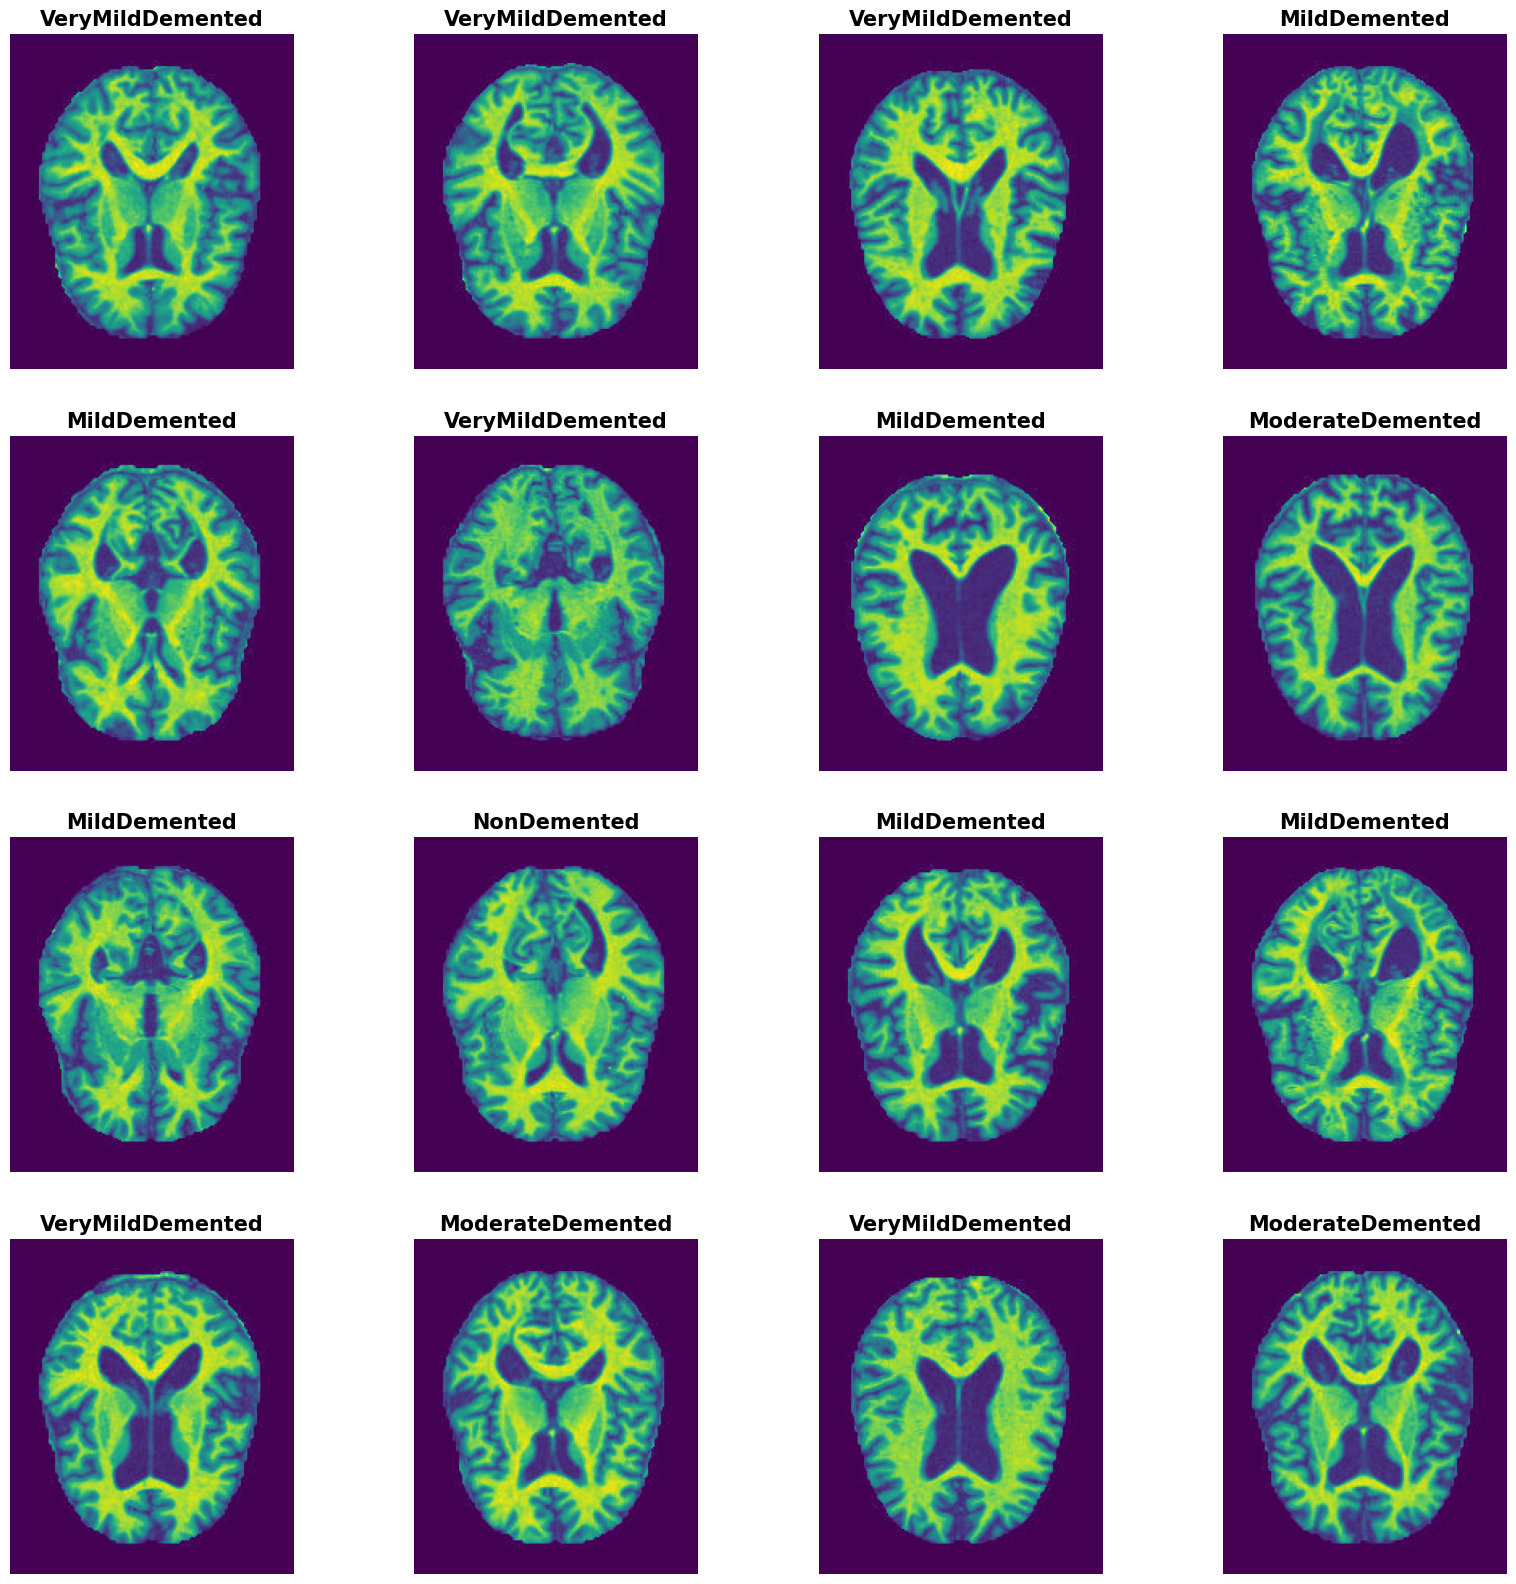

In [3]:
plt.figure(figsize=(20, 20)) 
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [4]:
SEED = 1   # maybe can do with random seed generator and compare results with different seed values in the future.
BATCH_SIZE = 32
IMG_SIZE = (128, 128)

X_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)


Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [5]:

X_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = SEED,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)


Found 5121 files belonging to 4 classes.
Using 1024 files for validation.


In [6]:
INPUT_SHAPE = IMG_SIZE + (3,)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.20))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation = 'softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [7]:
history = model.fit(X_train, epochs = 10, validation_data=X_validation, verbose=1)

Epoch 1/10
129/129 [==============================] - 81s 562ms/step - loss: 1.0153 - accuracy: 0.5067 - val_loss: 0.9004 - val_accuracy: 0.5957
Epoch 2/10
129/129 [==============================] - 108s 832ms/step - loss: 0.8534 - accuracy: 0.6061 - val_loss: 0.9460 - val_accuracy: 0.5234
Epoch 3/10
129/129 [==============================] - 111s 854ms/step - loss: 0.7240 - accuracy: 0.6768 - val_loss: 0.6714 - val_accuracy: 0.7119
Epoch 4/10
129/129 [==============================] - 107s 821ms/step - loss: 0.4742 - accuracy: 0.8064 - val_loss: 0.4402 - val_accuracy: 0.8105
Epoch 5/10
129/129 [==============================] - 117s 900ms/step - loss: 0.2986 - accuracy: 0.8826 - val_loss: 0.2413 - val_accuracy: 0.9189
Epoch 6/10
129/129 [==============================] - 112s 866ms/step - loss: 0.1900 - accuracy: 0.9256 - val_loss: 0.2437 - val_accuracy: 0.8955
Epoch 7/10
129/129 [==============================] - 109s 840ms/step - loss: 0.1180 - accuracy: 0.9597 - val_loss: 0.1124 - 

In [8]:
model_evaluate = model.evaluate(X_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

32/32 [==============================] - 9s 256ms/step - loss: 0.1283 - accuracy: 0.9473
Accuracy: % 94.73
Loss: % 12.83


[]

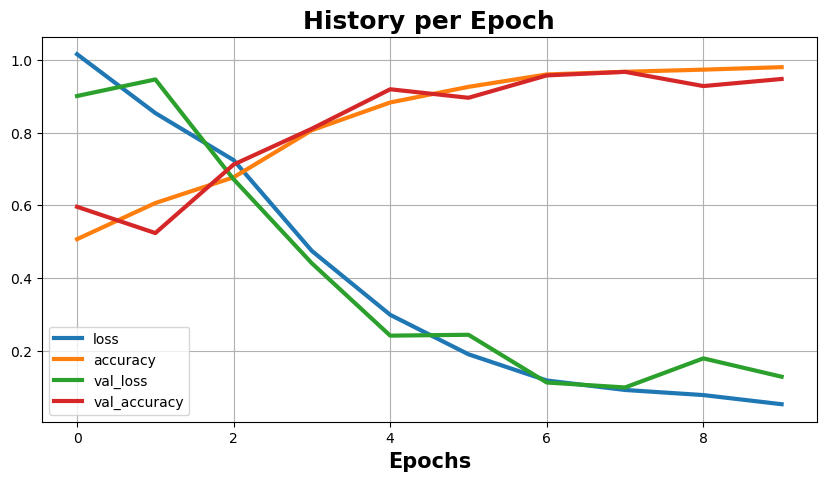

In [26]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(10,5), lw=3, grid='on')
ax.set_title('History per Epoch', fontsize=18, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=15, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 111ms/step


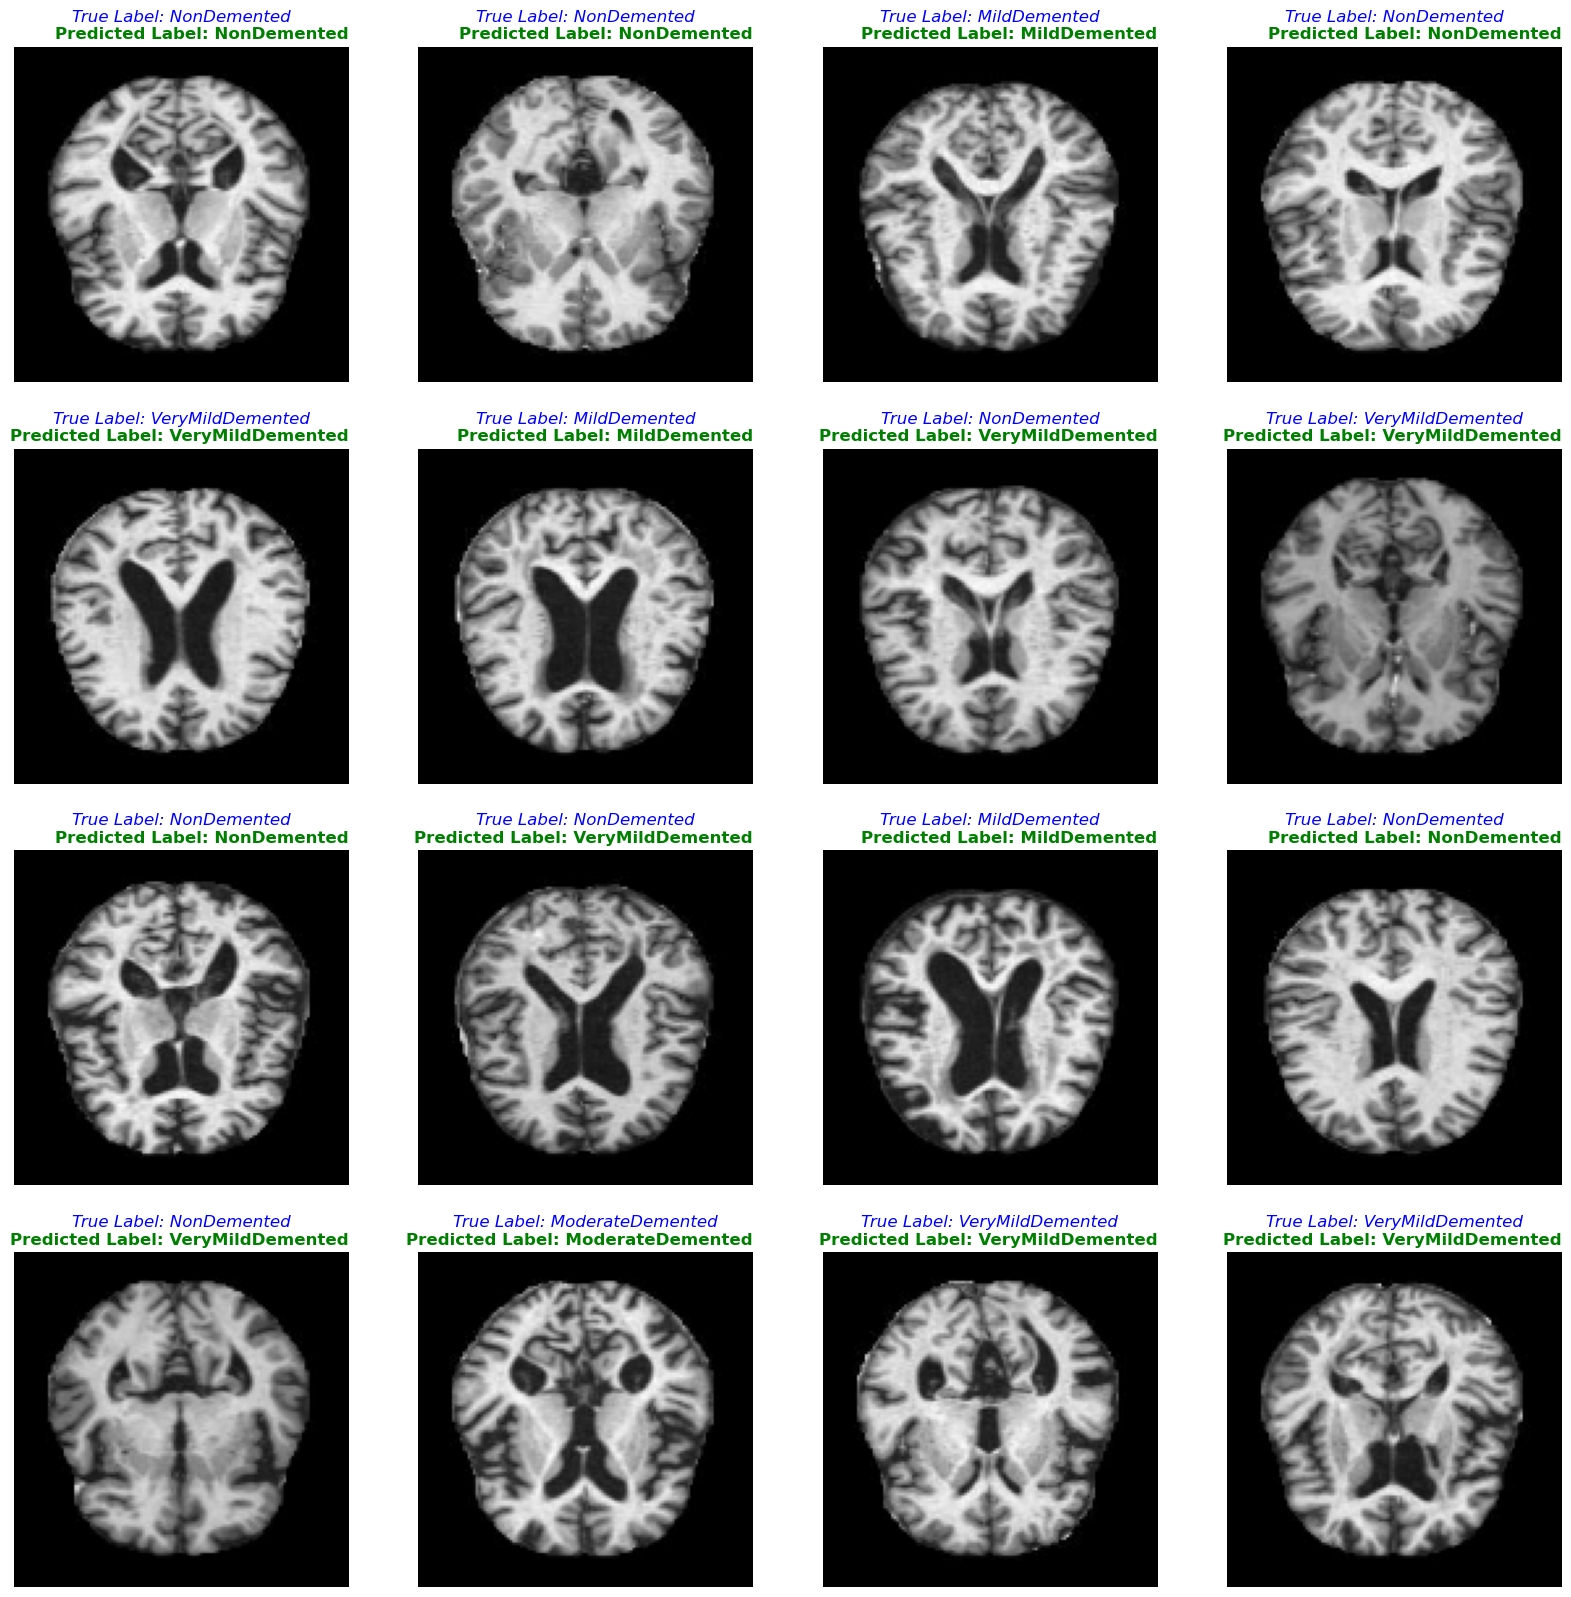

In [10]:
plt.figure(figsize=(20, 20))
for image, label in X_validation.take(1): 
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("True Label: " + class_names[label[i]]+'\n', fontsize=12, style='italic', color='blue', loc='center')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.imshow(image[i].numpy().astype("uint8"))

In [11]:
model.save('alz.h5')
print('Model Saved!')

Model Saved!
